<a href="https://colab.research.google.com/github/eovallemagallanes/pattern-recognition/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

In general, polynomial models are of the form:
$$
y = f(x) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \cdots + \beta_d x_i^d + \epsilon_i, \quad i = 1, 2, \cdots, n.
$$
where $d$ is the degree of the polynomial. 

Notice that the non-linear relationship between $y$ and $x$ is captured by the polynomial terms but the models remain linear in the parameters/coefficients $\beta_k$. 
As such, to fit this model means to compute $\beta_0, \beta_1, \beta_2, \cdots, \beta_d$ i.e., by standard square error (SE).

The data and the model can be expressed in a vector notation where the i-th row of $\mathbf{X}$ and $\mathbf{Y}$ will contain the $x$ and $y$ value for the i-th data sample, such as:
$$
\mathbf{Y} = 
\begin{bmatrix}
y_1 \\ y_2\\ y_3 \\ \vdots \\ y_d
\end{bmatrix},
\mathbf{X} = 
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^d \\ 1 & x_2 & x_2^2 & \cdots & x_2^d  \\ 1 & x_3 & x_3^2 & \cdots & x_3^d  \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^d  
\end{bmatrix},
\boldsymbol{\beta} = 
\begin{bmatrix}
\beta_0 \\ \beta_1\\ \beta_2 \\ \vdots \\ \beta_d
\end{bmatrix},
\boldsymbol{\epsilon} = 
\begin{bmatrix}
\epsilon_1\\ \epsilon_2 \\ \vdots \\ \epsilon_n
\end{bmatrix},
$$
which when using pure matrix notation is written as
$$
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}.
$$

Thus, by etimating the parameters with SE by minimizing w.r.t  $\boldsymbol{\beta}$ yields
$$
\boldsymbol{\beta}^\ast = \underset{\boldsymbol{\beta}}{\mathrm{argmin}}  F(\boldsymbol{\beta}) = \frac{1}{2} ||\mathbf{Y} - \mathbf{X} \boldsymbol{\beta} ||^2.
$$

Given that $F$ is convex, the minimum is found by solving the gradient of $F$:
$$
\nabla_{\boldsymbol{\beta}} F(\boldsymbol{\beta}) = 0, 
$$
this yields to:
$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{Y}
$$

**Regularization** constrains (shrinks) the coefficient estimates towards zero. Thus, te regularization discourages learning a more complex or flexible model to avoid the risk of overfitting.
In this way, a tunning parameter $\lambda$ decides the penalization of the model. 
$$
F(\boldsymbol{\beta}) = ||\mathbf{Y} - \mathbf{X} \boldsymbol{\beta} ||^2 + \lambda ||\boldsymbol{\beta}||^2.
$$
Now, by minimizing the SE:
$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\intercal \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\intercal \mathbf{Y}.
$$

When $\lambda = 0$, the penalty term has no eﬀect, however, as $\lambda \rightarrow \infty$, the cofficient estimates will approach zero.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def transform(X, degree):
    m, n = X.shape  
    X_transform = np.ones((m, 1)) 
    j = 0     
    for j in range(degree + 1) :
        if j != 0 :
            x_pow = np.power(X, j)  
            # append x_pow to X_transform  
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis = 1)
    
    return X_transform  

In [2]:
def gendata(degree):
    B = np.random.randint(low=-10, high=10, size=(degree+1, 1))
    X = np.arange(-2, 2, 0.2)
    X = np.expand_dims(X, axis=-1)
    Y = transform(X, degree)@B 
    noise = np.random.normal(0,1,len(Y))# 5*np.random.rand(*Y.shape)
    noise = np.expand_dims(noise, axis=-1)
    Y = Y + noise

    return X, Y, B


In [3]:
def fitting(X, Y, degree, regularization=False, l=0.01):
    X_transform = transform(X, degree)
    print('Regularization: ', regularization)
    if regularization:
        B = np.linalg.inv(X_transform.T@X_transform + l*np.eye(degree+1))@(X_transform.T@Y)
    else:
        B = np.linalg.inv(X_transform.T@X_transform)@(X_transform.T@Y)

    return B

In [4]:
def mse(X, Y, B):
    degree = len(B) - 1
    X_transform = transform(X, degree)
    Y_hat = X_transform@B
    err = np.linalg.norm(Y-Y_hat)
    return err

In [5]:
def printpoly(B):
    print('f(x) = %f +' %(B[0]), end='')
    for i, b in enumerate(B[1:-1]):
        print('%fx^%d +' %(b, i+1), end='')
    print('%fx^%d' %(B[-1], len(B)-1)) 

In [6]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox, IntSlider, ToggleButton

In [7]:
def runner(X, Y, degree_fit, reg, l):
    # apply polynomial fitting
    B = fitting(X, Y, degree_fit, reg, l)
    print('B:\n', B)
    err = mse(X, Y, B)
    print('MSE: ', err)
    eps = 0.01
    x_min = np.min(X) - eps
    x_max = np.max(X) + eps

    # plot data & fitting
    x_eval = np.arange(x_min, x_max, 0.01)
    x_eval = np.expand_dims(x_eval, axis=-1)
    Y_hat = transform(x_eval, degree_fit)@B

    plt.plot(X, Y, '*', label='Data')
    plt.plot( x_eval, Y_hat, label='Estimated')
    plt.legend()
    plt.show()

    printpoly(B)
    return B

# Fit polynomial Data

f(x) = 4.000000 +-6.000000x^1 +-9.000000x^2


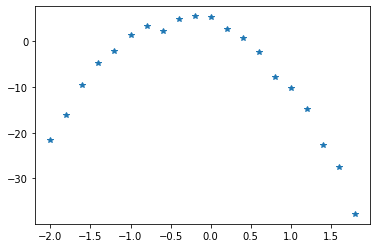

In [8]:
degree_real = 2
X, Y, B_real = gendata(degree_real)
printpoly(B_real)
plt.plot(X, Y, '*')
plt.show()

In [9]:
regularization_widget = Checkbox(value=False, description='Regularization', disabled=False, indent=False)
degree_fit_widget = IntSlider(min=1, max=5, step=1, value=1, continuous_update=False)
lambda_widget = FloatSlider(min=0.01, max=1, step=0.01, value=0.01, continuous_update=False)

w2 = interactive(runner, X=fixed(X), Y=fixed(Y), degree_fit=degree_fit_widget, reg=regularization_widget, l=lambda_widget);
display(w2)

interactive(children=(IntSlider(value=1, continuous_update=False, description='degree_fit', max=5, min=1), Che…

# Fit Gaussian Data

In [14]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-4, 4, 30)
x_values = np.expand_dims(x_values, axis=-1)
mu = 0
sig = 2
y_values = gaussian(x_values, mu, sig)

In [15]:
# add a noisy point
y_values[5]*=-10

In [16]:
regularization_widget = Checkbox(value=False, description='Regularization', disabled=False, indent=False)
degree_fit_widget = IntSlider(min=1, max=10, step=1, value=1, continuous_update=False)
lambda_widget = FloatSlider(min=0.01, max=10, step=0.01, value=1, continuous_update=False)

w2 = interactive(runner, X=fixed(x_values), Y=fixed(y_values), degree_fit=degree_fit_widget, reg=regularization_widget, l=lambda_widget);
display(w2)

interactive(children=(IntSlider(value=1, continuous_update=False, description='degree_fit', max=10, min=1), Ch…